In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib
font = {'size'   : 14}
matplotlib.rc('font', **font)

In [ ]:
neg,avs,avm,avf,ri,rd = np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8)),np.zeros((8,8))
for m in range(8):
    for n in range(8):
        dnm = np.load('data/k4_r/m' + str(m+5) + '_n' + str(n+5) + '.npy')
        diff = dnm[:,0] - dnm[:,1]
        neg[m,n] = np.sum(diff<0)
        avs[m,n] = np.mean(dnm[:,0])
        avf[m,n] = np.mean(dnm[:,1])
        ri[m,n] = (avs[m,n] - avf[m,n]) / avs[m,n]
        
np.sum(neg)

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
im = ax.imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri), origin='lower');

div = make_axes_locatable(ax)
cax = div.append_axes("right", size="3%", pad=0.1)
plt.colorbar(im, cax=cax);
np.mean(ri)

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(16,4),sharey=True)

im0 = ax[0].imshow(neg, cmap='Blues', vmin=0, vmax=np.max(neg), origin='lower')
ax[0].set_title('Number of negative optimizations out of 100')
im1 = ax[1].imshow(avs, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[1].set_title('Average initial distance')
im2 = ax[2].imshow(avf, cmap='Blues', vmin=0, vmax=np.max(avs), origin='lower')
ax[2].set_title('Average final distance')
im3 = ax[3].imshow(ri, cmap='Blues', vmin=0, vmax=np.max(ri), origin='lower')
ax[3].set_title('Relative improvement')

ax[0].set_ylabel('M: number of observables');
iml = [im0,im1,im2,im3]
xtk = 5+np.arange(0,8)
for i in range(4):
    a = ax[i]
    a.set_xticks(np.arange(0,8))
    a.set_yticks(np.arange(0,8))
    a.set_xticklabels(xtk)
    a.set_yticklabels(xtk);
    a.set_xlabel('N: number of experiments')
    #a.scatter(xind,yind, marker='.', s=6, color='k')
    
    div = make_axes_locatable(a)
    cax = div.append_axes("right", size="3%", pad=0.1)
    plt.colorbar(iml[i], cax=cax);
    
fig.tight_layout()

In [ ]:
#fig.savefig('k4-res.jpg', dpi=100)

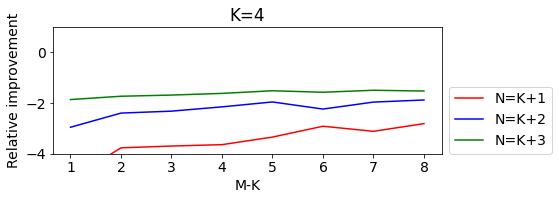

In [8]:
fig,ax = plt.subplots(1,1,figsize=(8,3))
ax.plot(1+np.arange(0,8), ri[:,0], label='N=K+1', color = 'r')
ax.plot(1+np.arange(0,8), ri[:,1], label='N=K+2', color = 'b')
ax.plot(1+np.arange(0,8), ri[:,2], label='N=K+3', color = 'g')
ax.legend(loc=(1.02,0))
ax.set_ylim(-4,1);
ax.set_ylabel('Relative improvement');
ax.set_xlabel('M-K');
ax.set_title('K=4')
fig.tight_layout()

In [9]:
fig.savefig('figures/k4-lines-r.pdf')

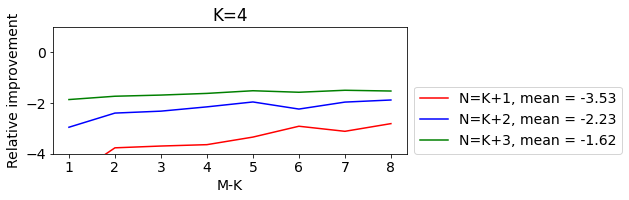

In [12]:
fig,ax = plt.subplots(1,1,figsize=(9,3))
ax.plot(1+np.arange(0,8), ri[:,0], label='N=K+1, mean = %.2f' % np.mean(ri[:,0]), color = 'r')
ax.plot(1+np.arange(0,8), ri[:,1], label='N=K+2, mean = %.2f' % np.mean(ri[:,1]), color = 'b')
ax.plot(1+np.arange(0,8), ri[:,2], label='N=K+3, mean = %.2f' % np.mean(ri[:,2]), color = 'g')
ax.legend(loc=(1.02,0))
ax.set_ylim(-4,1);
ax.set_ylabel('Relative improvement');
ax.set_xlabel('M-K');
ax.set_title('K=4')
fig.tight_layout()

In [13]:
rik4 = np.mean(ri, axis=1)
rik4

array([-1.9017971 , -1.69754243, -1.6796542 , -1.65509064, -1.55576083,
       -1.52624427, -1.51785666, -1.45699731])

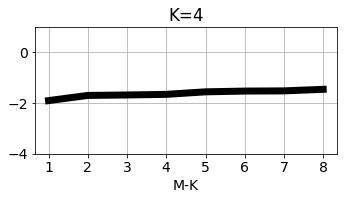

In [15]:
xtk = 1+np.arange(0,8)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(xtk, np.mean(ri, axis=1), color = 'k', lw=7)
'''for i in range(8):
    ax.plot(1+np.arange(0,8), ri[:,i], label='N=K+%d' % (i+1))'''
#ax.legend(loc=(1.02,0))
ax.set_ylim(-4,1);
#ax.set_ylabel('Relative improvement');
ax.set_xlabel('M-K');
ax.set_title('K=4')
ax.set_xticks(xtk)
ax.grid(True)
fig.tight_layout()

In [16]:
np.mean(ri, axis=1)

array([-1.9017971 , -1.69754243, -1.6796542 , -1.65509064, -1.55576083,
       -1.52624427, -1.51785666, -1.45699731])

In [17]:
np.save('data/ri/ri4_r.npy', ri)
print(ri)

[[-4.98892468 -2.9525685  -1.8602137  -1.31483575 -1.20933437 -1.09576506
  -0.88584114 -0.90689358]
 [-3.76443452 -2.39400029 -1.72946382 -1.39987194 -1.27807591 -1.09954336
  -1.06224515 -0.85270448]
 [-3.69347848 -2.31765508 -1.68348173 -1.49729275 -1.22664618 -1.14958228
  -0.99495084 -0.8741462 ]
 [-3.63945627 -2.14863284 -1.6173629  -1.48848901 -1.28624199 -1.05435223
  -1.0703087  -0.93588114]
 [-3.34061261 -1.95528933 -1.51273636 -1.28879765 -1.26120654 -1.10572405
  -1.00487168 -0.97684838]
 [-2.91279173 -2.23535371 -1.57239002 -1.27590569 -1.10873929 -1.15174753
  -1.02005347 -0.93297274]
 [-3.11301225 -1.96053687 -1.49397892 -1.37901415 -1.25172349 -1.09038841
  -0.90663436 -0.94756483]
 [-2.8097724  -1.87793782 -1.52390966 -1.30169119 -1.15551652 -1.02355771
  -0.98723123 -0.97636192]]
